In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm 
from sklearn import metrics 

In [12]:
data = pd.read_csv("/Users/tonywang/Downloads/GSE58606_data.csv")

In [14]:
data.head()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
0,6.877643,8.080215,6.245265,6.304782,6.686064,7.805950,6.814781,7.146955,6.170680,6.129586,...,7.176684,7.724408,6.035476,6.255048,6.572019,6.251777,5.873303,6.362097,1,primary breast cancer
1,6.544287,6.882722,5.874236,6.324987,6.638048,6.946567,6.488574,6.690773,6.160272,6.104929,...,7.249094,7.308890,6.021796,6.902473,6.347183,6.625569,6.004899,6.560329,1,primary breast cancer
2,6.879713,6.885387,5.958748,6.317687,6.664956,7.266728,6.965078,6.969818,6.226957,6.124874,...,7.404104,7.466418,5.977962,6.484571,6.259788,6.226957,5.815442,6.354622,1,primary breast cancer
3,6.943464,7.972342,6.026106,6.425266,6.761433,8.010618,6.441945,6.679714,6.471518,6.264685,...,6.811846,8.601204,6.021790,5.912640,6.002302,5.999349,5.811117,6.306704,1,primary breast cancer
4,7.097877,9.014977,7.127656,6.566482,6.990273,8.746360,8.087122,7.680249,6.499892,6.226560,...,6.361862,7.570751,5.967819,5.821186,6.550078,5.947994,5.828413,6.288596,1,primary breast cancer


In [15]:
data.tail()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
128,7.069042,6.928371,6.361283,6.419449,7.047141,7.177212,6.653090,6.749214,6.404046,6.188651,...,7.267664,7.730168,6.023850,5.820426,6.118422,6.035515,5.776698,6.312001,1,primary breast cancer
129,7.220528,7.135147,6.358755,6.525857,7.054967,7.533287,6.645902,6.825213,6.416208,6.219274,...,6.557431,7.997207,6.125245,5.822034,6.008232,6.000131,5.807077,6.336421,1,primary breast cancer
130,6.753913,6.634270,6.167049,6.404217,6.760727,6.811819,6.340138,6.595280,6.340526,6.124168,...,7.216755,6.498206,6.160170,5.833019,5.949871,6.577482,6.395739,6.546783,1,primary breast cancer
131,6.949213,8.136970,6.530446,6.340408,6.839192,7.641705,7.269473,6.743930,6.403648,6.189620,...,7.165452,6.852333,5.975425,6.035830,6.323667,6.424863,5.780869,6.318444,0,normal breast tissue
132,7.266969,7.864109,6.411671,6.510445,7.053551,7.967349,8.531716,7.375104,6.501873,6.269286,...,6.447885,7.613908,6.078980,5.831657,6.100722,5.912673,5.799223,6.348078,1,primary breast cancer


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 1928 entries, 4040 : hsa-miR-9-5p to target_actual
dtypes: float64(1926), int64(1), object(1)
memory usage: 2.0+ MB


In [19]:
data.describe()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,...,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,7.043525,7.576666,6.395466,6.528483,6.896104,7.410507,6.846429,7.000399,6.346764,6.269354,...,5.987043,6.879116,7.365849,6.044175,5.990048,6.214771,6.078637,5.860256,6.328904,0.917293
std,0.274804,0.693923,0.311857,0.123438,0.179591,0.738667,0.443210,0.304624,0.096016,0.080831,...,0.070226,0.342232,0.601322,0.068184,0.247412,0.215750,0.161437,0.089878,0.104668,0.276480
min,6.544287,6.449102,5.839559,6.277386,6.273818,5.817342,6.228906,6.527857,6.089912,6.099233,...,5.862173,6.345074,6.246596,5.906457,5.788293,5.868281,5.884369,5.773184,6.077561,0.000000
25%,6.867353,7.018767,6.199525,6.431606,6.755002,6.894524,6.502194,6.772433,6.286641,6.201681,...,5.951420,6.581041,6.917885,5.993448,5.838956,6.043781,5.962152,5.816823,6.267153,1.000000
50%,6.986615,7.506330,6.376626,6.523289,6.880118,7.477918,6.752831,6.961824,6.340526,6.269286,...,5.973461,6.850715,7.357890,6.024197,5.893305,6.177852,6.047557,5.840790,6.326734,1.000000
75%,7.194863,7.974495,6.594995,6.610541,7.004239,7.886654,7.095057,7.153648,6.398110,6.321426,...,6.013347,7.165452,7.795471,6.104687,6.039242,6.325245,6.137680,5.873878,6.371613,1.000000
max,7.869898,9.289878,7.264142,6.835292,7.429032,9.270409,8.531716,8.040414,6.657749,6.473999,...,6.351982,7.652801,8.991300,6.238010,7.032159,7.184284,6.805058,6.413199,6.769885,1.000000


In [20]:
data.drop(data.columns[-1], axis=1, inplace=True)

<Axes: >

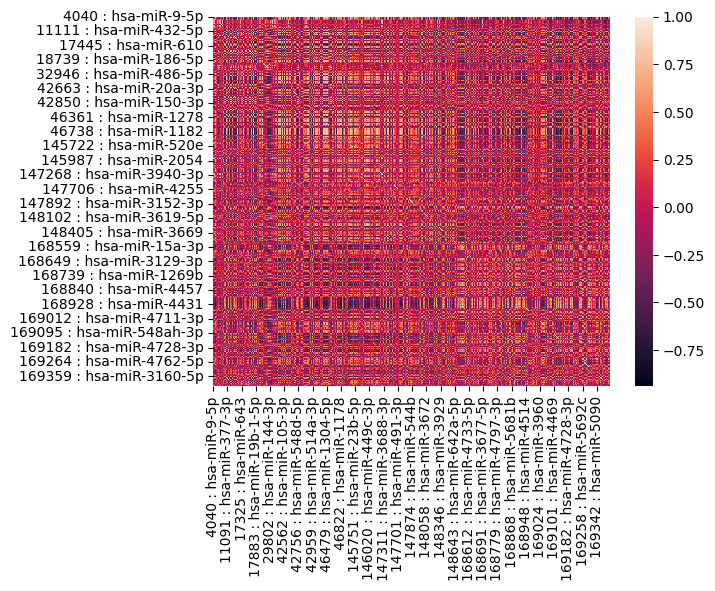

In [21]:
corr = data.corr()
sns.heatmap(corr)

<Axes: >

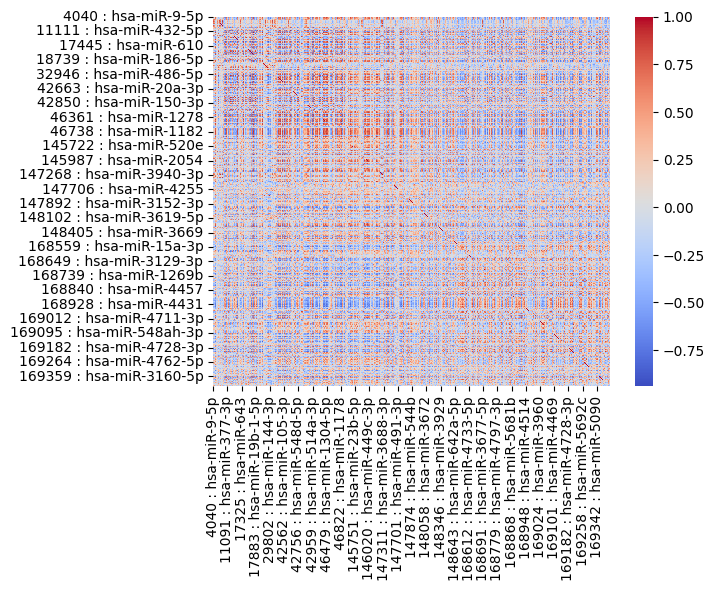

In [22]:
sns.heatmap(corr, cmap = 'coolwarm') 

In [23]:
prediction_var = ['4040 : hsa-miR-9-5p', '4610 : hsa-miR-126-3p', '4700 : hsa-miR-140-5p', '5250 : hsa-miR-105-5p', '6880 : hsa-miR-297']

In [24]:
train, test = train_test_split(data, test_size = 0.2) 

print(train.shape) 
print(test.shape) 

(106, 1927)
(27, 1927)


In [26]:
train_X = train[prediction_var]
train_Y = train.target

test_X = test[prediction_var]
test_Y = test.target

In [27]:
best_accuracy = 0 
best_n_estimators = 0
for i in range(10, 50):
    model = RandomForestClassifier(n_estimators = i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    if metrics.accuracy_score(prediction, test_Y) > best_accuracy: 
        best_accuracy = metrics.accuracy_score(prediction, test_Y)
        best_n_estimators = i

In [28]:
print(best_accuracy)
print(best_n_estimators)

1.0
13


In [29]:
model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction, test_Y)

0.9259259259259259

In [43]:
import IPython

In [44]:
# Import the IPython module to access its functions
from IPython.display import display, Javascript

# Use JavaScript to get the current notebook's file path
display(Javascript('IPython.notebook.notebook_path'))

<IPython.core.display.Javascript object>